<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Clustering/Clustering_and_Dimensionality_Reduction_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

To appreicate the bells and whistles of different clustering techniques, it is best to first play with some synthetic data.

#Clustering

## Create Data

In [72]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs

Let's create two clusters.

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



<Axes: xlabel='x', ylabel='y'>

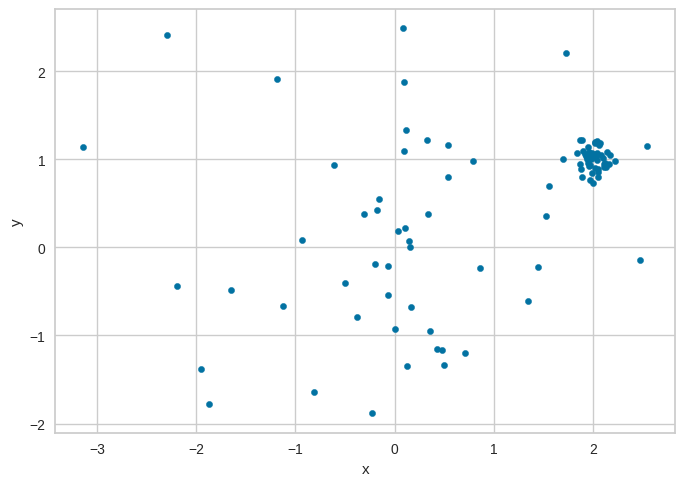

In [73]:
X, _ = make_blobs(n_samples=50, centers=[[0,0]], n_features=2,  cluster_std = 1)
df = pd.DataFrame(X, columns=['x', 'y'])

X, _ = make_blobs(n_samples=50, centers=[[2,1]], n_features=2,  cluster_std = 0.1)
df2 = pd.DataFrame(X, columns=['x', 'y'])

df = pd.concat([df, df2], axis=0)

df.plot.scatter(x='x', y='y')

## Cluster Analysis - Hierarchical

<Axes: xlabel='x', ylabel='y'>

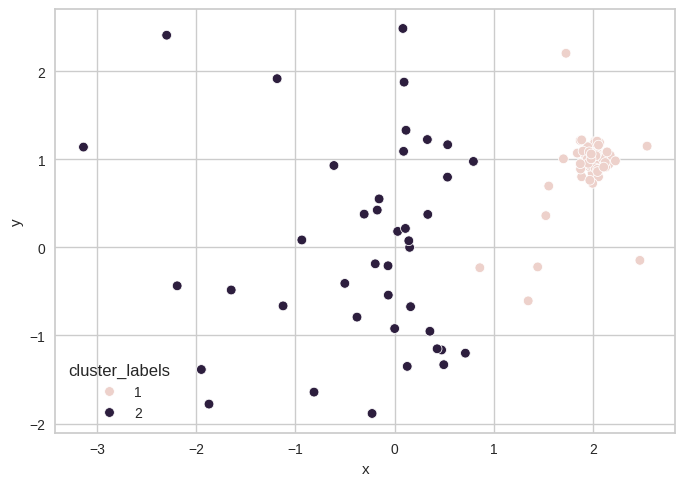

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

n_clusters = 2

Z = linkage(df, 'ward') #Try different ones.
df['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust')

sns.scatterplot(df, x='x', y='y', hue='cluster_labels')

Plot the dendrogram

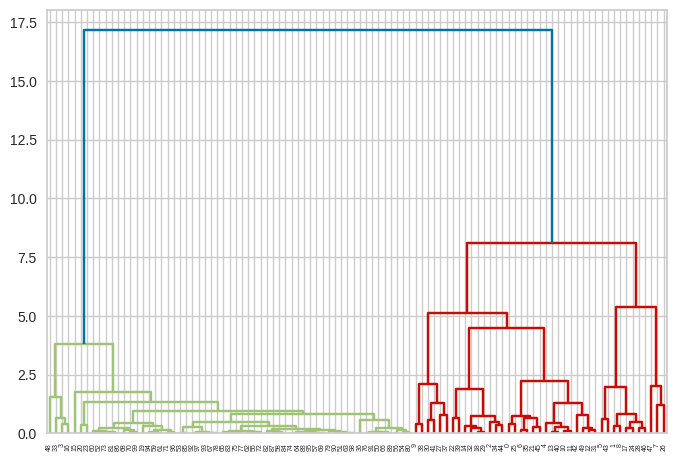

In [75]:
from scipy.cluster.hierarchy import dendrogram
_ = dendrogram(Z)

## Cluster Analysis - Kmeans

In [76]:
df_kmeans = df.drop('cluster_labels', axis=1)

Find the cluster centroids

In [77]:
from sklearn.cluster import KMeans

In [78]:
kmeans_result = KMeans(n_clusters).fit(df_kmeans)  #, init = [[2, 1 ],[0, 0]] ,init='random'

In [79]:
kmeans_result.cluster_centers_

array([[ 1.82928745,  0.99170379],
       [-0.42261059, -0.23021751]])

Assign each point to its cluster

In [80]:
df_kmeans['cluster_labels'] = kmeans_result.labels_

Plot the clustering

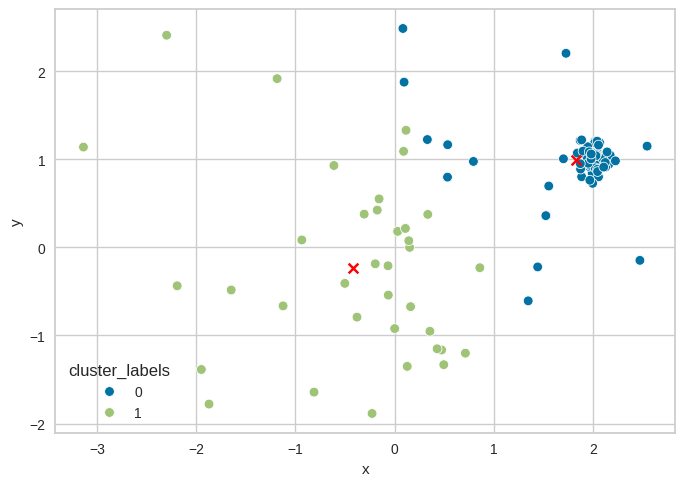

In [81]:
import matplotlib.pyplot as plt

# Plot clusters
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df_kmeans)

#plot centroids
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1], color='red', marker='x')

# Show the plot with the new points
plt.show()

## Clustering 3D data

In [82]:
import numpy as np

# First distribution

num_samples = 100
centers = [[0, 0, 0]]
cluster_std = [[1, np.sqrt(2), 1]]

samples, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [83]:
# Second distribution

num_samples = 100
centers = [[3, 3, 3]]
cluster_std = [[np.sqrt(2), 1, 1]]

samples2, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [84]:
# Third distribution

num_samples = 150
centers = [[5, 5, 5]]
cluster_std = [[0.5,1,0.5]]

samples3, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

Let's put all samples together in a dataframe

In [85]:
df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

In [86]:
df_3d

,x,y,z
0,0.989619,-1.396017,0.186612
1,0.189508,-0.555403,-0.383450
2,-0.356320,0.275284,0.298673
3,-0.309488,-0.002320,2.008864
4,-0.235925,0.846955,-0.105805
...,...,...,...
145,5.037805,5.997840,5.761756
146,5.321329,6.924734,5.707136
147,4.884206,5.886707,5.141885
148,4.603198,6.614524,4.914209


Let's [plot it](https://plotly.com/python/3d-scatter-plots/) in 3D.

In [87]:
import plotly.express as px


fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try some hierarchical clustering

In [88]:
Z = linkage(df_3d, 'ward')
df_3d['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

In [89]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try k-means

In [90]:
kmeans_model = KMeans(3,random_state=42)
kmeans_result = kmeans_model.fit(df_3d[['x', 'y', 'z']])

In [91]:
df_3d['cluster_labels'] = kmeans_result.labels_
df_3d

,x,y,z,cluster_labels
0,0.989619,-1.396017,0.186612,2
1,0.189508,-0.555403,-0.383450,2
2,-0.356320,0.275284,0.298673,2
3,-0.309488,-0.002320,2.008864,2
4,-0.235925,0.846955,-0.105805,2
...,...,...,...,...
145,5.037805,5.997840,5.761756,1
146,5.321329,6.924734,5.707136,1
147,4.884206,5.886707,5.141885,1
148,4.603198,6.614524,4.914209,1


In [92]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3)
fig.show()

##Determining best K

We will use [`yellowbrick`](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

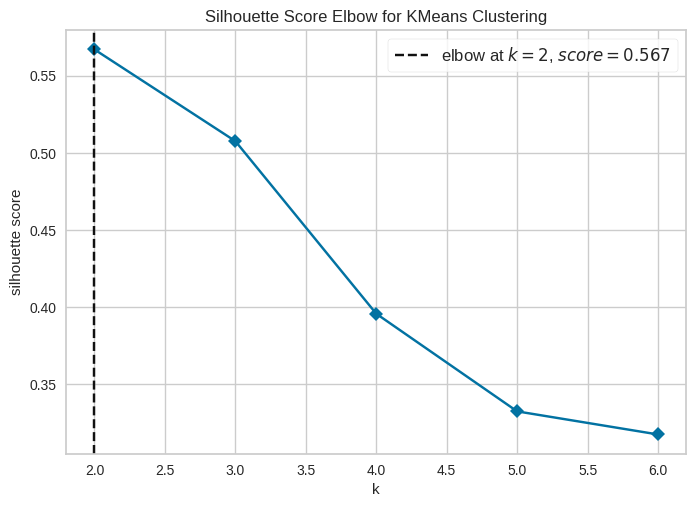

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [93]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans_model, k=(2,7), metric="silhouette", timings=False)

visualizer.fit(df_3d[['x', 'y', 'z']])
visualizer.show()

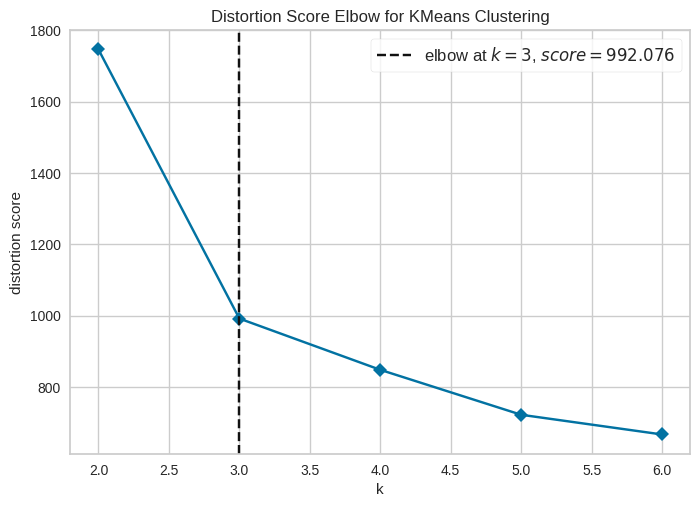

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans_model, k=(2,7), metric="distortion", timings=False)

visualizer.fit(df_3d[['x', 'y', 'z']])
visualizer.show()

###Let's visualize the silouette scores per datapoint.

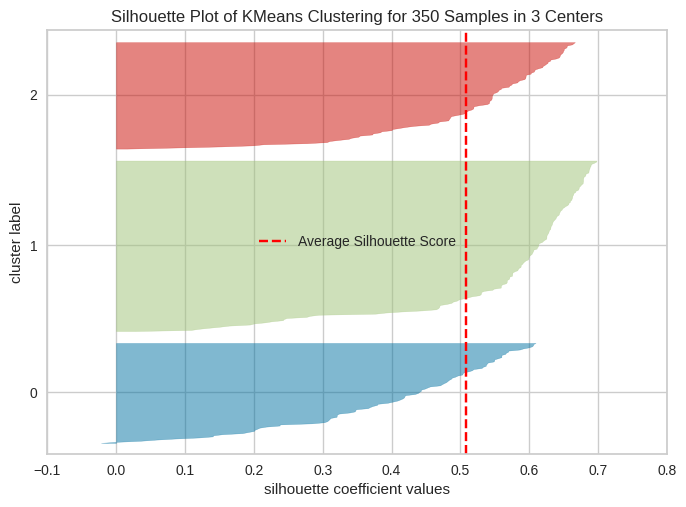

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 350 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [95]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick', timings=False)

visualizer.fit(df_3d[['x', 'y', 'z']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

##Things we could try:


1.   What if we make the data non-Gaussian? Try [generating swiss rolls or curves](https://scikit-learn.org/1.5/datasets/sample_generators.html#generators-for-manifold-learning).
2.   Trying different densities, sizes, number of clusters, initialization, etc.


#Dimensionality Reduction

##Create data

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs

# First distribution

num_samples = 100
centers = [[0, 0, 0]]
cluster_std = [[1, 1, 1]]

samples, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [97]:
# Second distribution

num_samples = 100
centers = [[3, 3, 3]]
cluster_std = [[1, 1, 1]]

samples2, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [98]:
# Third distribution

num_samples = 100
centers = [[6, 6, 6]]
cluster_std = [[1, 1, 1]]

samples3, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [99]:
df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

In [100]:
# df_3d["y"] = 3*df_3d["z"] # What happens if one feature is redundant of the another?

In [101]:
df_3d

,x,y,z
0,-0.665041,0.578300,-1.037525
1,1.068156,-0.843173,0.327724
2,0.133564,-1.141354,-0.120241
3,-0.041811,0.375313,0.408981
4,-0.236562,-1.804110,-0.025579
...,...,...,...
95,5.943499,6.746216,6.351074
96,5.360793,6.763441,6.503044
97,7.518277,6.637306,4.849290
98,5.586492,4.320827,3.999107


In [102]:
import plotly.express as px


fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3, opacity = 0.7) # makes the points smaller (better visualization)
fig.show()

##PCA

###Apply PCA

Create the model

In [103]:
from sklearn.decomposition import PCA

# Create the model
model = PCA()

#fit the data
model.fit(df_3d)

PCA()

Transform the data (i.e., get the **scores**)

In [104]:
import pandas as pd

# transform data to the new space
transformed_data = model.transform(df_3d)

# create a df out of the transformed data
transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC1', 'PC2', 'PC3'])
transformed_data_df



,PC1,PC2,PC3
0,-5.802687,0.210731,1.199001
1,-4.839150,0.757770,-1.180245
2,-5.811758,0.385567,-0.899985
3,-4.733341,-0.252648,0.120215
4,-6.357727,0.116804,-1.363540
...,...,...,...
295,5.831937,-0.357214,0.411377
296,5.588910,-0.893929,0.537124
297,5.831167,1.816481,0.560353
298,2.878382,1.176372,-0.271515


Let's look at the resulting principal components. These are also called the **loadings**

In [105]:
components_df = pd.DataFrame(model.components_, index=['PC1', 'PC2', 'PC3'], columns = ['x', 'y', 'z'])
components_df

,x,y,z
PC1,0.582738,0.579695,0.569535
PC2,0.746663,-0.105275,-0.656819
PC3,-0.320796,0.808005,-0.494184


**Question**: What do you think is the magnitude of each of these?

Plot the data with the new PCA coordinates

In [106]:
import plotly.express as px
import plotly.graph_objects as go


# Create a 3D scatter plot
fig = px.scatter_3d( #scatter_3d scatter
    transformed_data_df,
    x="PC1",  # First principal component
    y="PC2",  # Second principal component
    z="PC3",  # Third principal component
)

fig.update_traces(
    marker=dict(
        size=3,  # Smaller marker size
        opacity=0.7  # Transparency (alpha)
    )
)


# Add an arrow for each original dimensions
scale_factor = 2  # Adjust the scale factor as needed
for i, feature in enumerate(components_df.columns):
    fig.add_trace(
        go.Scatter3d(
            x=[0, scale_factor * components_df[feature].iloc[0]],
            y=[0, scale_factor * components_df[feature].iloc[1]],
            z=[0, scale_factor * components_df[feature].iloc[2]],
            mode="lines",
            line=dict(color="red", width=5),
            showlegend=False,
        )
    )
    fig.add_trace(
        go.Scatter3d(
            x=[scale_factor * components_df[feature].iloc[0]],
            y=[scale_factor * components_df[feature].iloc[1]],
            z=[scale_factor * components_df[feature].iloc[2]],
            mode="text",
            showlegend=False,
            text=[f"<b>{feature}</b>"],  # Bold text for better readability
            textfont=dict(size=15, color="red"),  # Match text color to the line
            textposition="top center",  # Position the text more naturally
        )
    )

# ensures all axes are at the same scale
fig.update_layout(
    scene=dict(
        aspectmode="data"
    )
)

# Show the plot
fig.show()

###Scree Plot

We will use [`psynlig`](https://psynlig.readthedocs.io/en/latest/)

In [107]:
!pip install psynlig -q

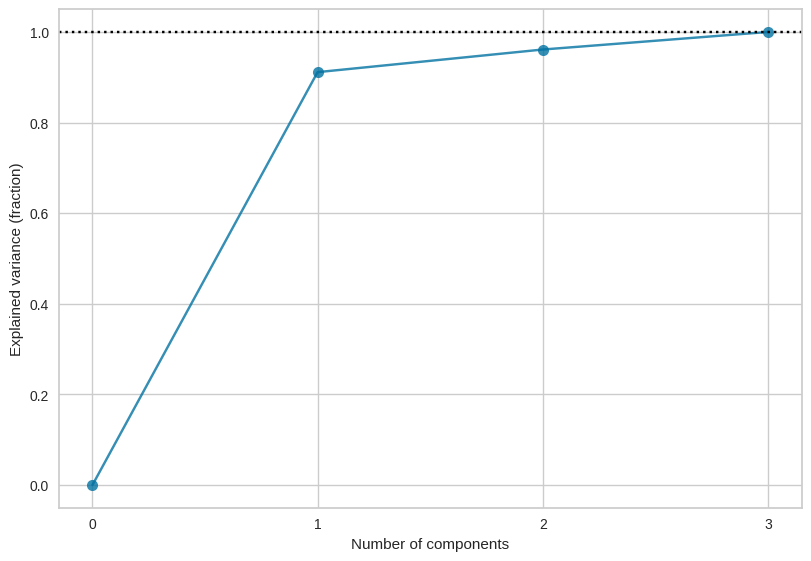

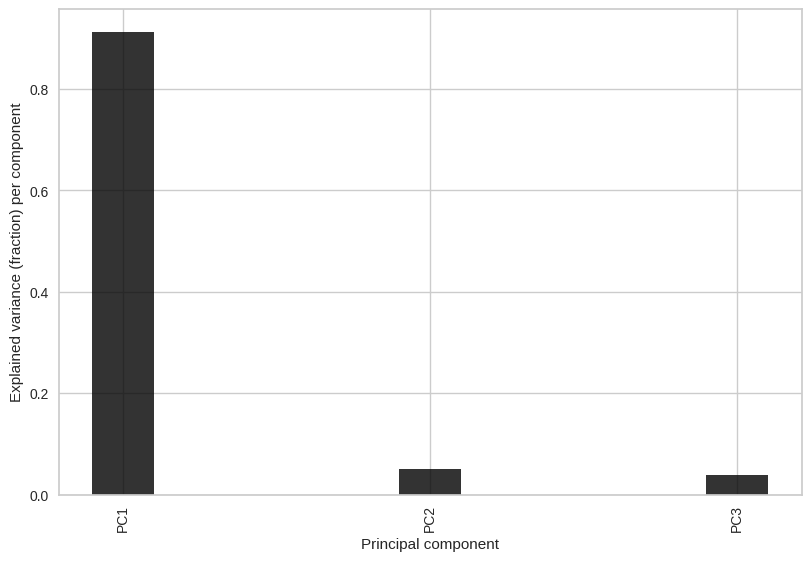

In [108]:
from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

In [109]:
model.explained_variance_ratio_

array([0.9113741 , 0.04992323, 0.03870267])

### PCA and Inverse PCA

Let's extract the 2 major loadings and then reinterpret the data in the space of the original features.

In [110]:
# Create the model
model = PCA(2)

#fit the data
model.fit(df_3d)
transformed_data = model.transform(df_3d)

Reduce the data to 2D

In [111]:
transformed_data_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'])

fig = px.scatter(transformed_data_df, x='PC1', y='PC2')
fig.update_traces(marker_size = 5) # makes the points smaller (better visualization)


fig.show()

Reconstruct in 3D

In [112]:
reconstruced_data = model.inverse_transform(transformed_data_df.to_numpy())
reconstruced_data_df = pd.DataFrame(reconstruced_data, columns = ['x', 'y', 'z'])

In [113]:
fig = px.scatter_3d(reconstruced_data_df, x='x', y='y', z='z')
fig.update_traces(marker_size = 3, opacity = 0.7) # makes the points smaller (better visualization)

fig.show()

**Question:** Can you explain what you are seeing?

###Reconstruction Error and Anomaly Removal

Calculate the reconstruction error

In [114]:
from sklearn.metrics import mean_squared_error
import numpy as np

reconstructed_data = model.inverse_transform(transformed_data_df)

# Calculate reconstruction error (mean squared error)
reconstruction_errors = np.sqrt(mean_squared_error(df_3d.T, reconstruced_data_df.T, multioutput='raw_values'))
# reconstruction_errors = np.mean((normalized_data - reconstructed_data) ** 2, axis=1) ### A second approach

Plot the distribution of errors

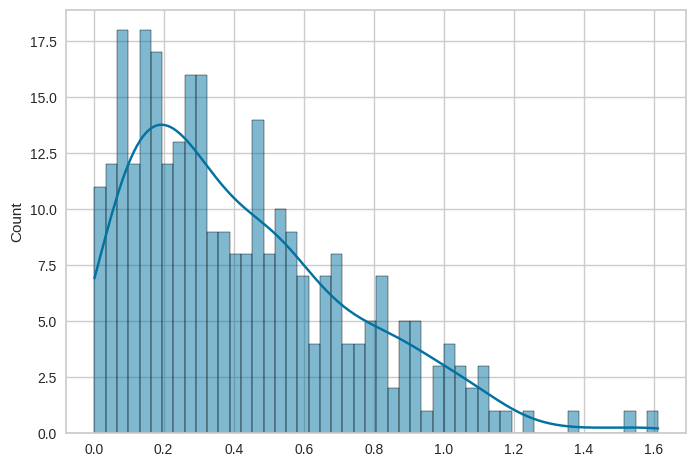

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(reconstruction_errors, kde=True, bins=50)
plt.show()

Remove datapoints with high reconstruction error

In [116]:
# Compute 95th percentile threshold
threshold = np.percentile(reconstruction_errors, 95)

# Get datapoints above the 95th percentile
outliers = df_3d[reconstruction_errors > threshold]

# Keep datapoints at or below the 95th percentile
df_3d_without_outliers = df_3d[reconstruction_errors <= threshold]

Plot the data after removing the outliers

In [117]:
# Base scatter (non-outliers)
fig = px.scatter_3d(
    df_3d_without_outliers,
    x='x', y='y', z='z'
)

# Apply shared styling ONCE
fig.update_traces(
    marker=dict(size=3),
    opacity=0.7
)

# Create outlier trace
outlier_trace = px.scatter_3d(
    outliers,
    x='x', y='y', z='z'
).data[0]

# Only difference: color
outlier_trace.marker.color = 'red'
outlier_trace.marker.size = 3
outlier_trace.marker.opacity = 0.7

# Add to figure
fig.add_trace(outlier_trace)

fig.show()


###Questions

1. Can you plot the boxplots that show the variance of the data along each PC?
2. Try different blob sizes and densities and analyze the effects of these factors.

## UMAP

Let's plot the data using UMAP

In [120]:
!pip install umap-learn -q

In [121]:
import umap
import plotly.express as px

from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
df_3d_scaled = scaler.fit_transform(df_3d)
df_3d_scaled = pd.DataFrame(df_3d_scaled, columns=df_3d.columns)


# Use UMAP to reduce the dimensionality of the data
reducer = umap.UMAP(n_components=2, ) # n_neighbors=15, min_dist=0.1
umap_embeddings = reducer.fit_transform(df_3d_scaled)

# Create a DataFrame for the UMAP embeddings
umap_df = pd.DataFrame(umap_embeddings, columns=["UMAP1", "UMAP2"]) # , "UMAP3"

# Create a 3D scatter plot with hover information
# fig = px.scatter_3d(
#     umap_df,
#     x="UMAP1",
#     y="UMAP2",
#     z="UMAP3",
#     opacity=0.7,
#     color_discrete_sequence=px.colors.qualitative.Set2
# )
fig = px.scatter(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize marker size
fig.update_traces(marker=dict(size=5))

# Display the plot
fig.show()

##Autoencoder prep code.

Using [`pythae`](https://pythae.readthedocs.io/en/latest/) for autoencoders.

In [49]:
!pip install pythae -q

from tqdm import tqdm
tqdm.disable = True

from typing import List
import torch.nn as nn
import torch
import numpy as np
from pythae.models.nn import BaseDecoder, BaseEncoder
from pythae.models.base.base_utils import ModelOutput
from pythae.models import VAE, VAEConfig
from pythae.models import AE, AEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines import TrainingPipeline
from pythae.trainers.training_callbacks import TrainingCallback

import logging


In [50]:
# Disable every logger under 'pythae'
for name in logging.Logger.manager.loggerDict.keys():
    if name.startswith("pythae"):
        logger = logging.getLogger(name)
        logger.handlers.clear()
        logger.propagate = False
        logger.setLevel(logging.CRITICAL)

# Also silence the root logger if needed
logging.getLogger().setLevel(logging.CRITICAL)



In [51]:
class StreamlitLossCallback(TrainingCallback):
    def __init__(self):
        super().__init__()
        self.best_train_loss = np.inf
        self.num_epochs = 0

    def on_log(self, training_config, logs, **kwargs):
        self.num_epochs = self.num_epochs + 1

        # if parts:
        loss = logs["train_epoch_loss"]
        if loss < self.best_train_loss:
            self.best_train_loss = loss
        if self.num_epochs % 100 == 0:
            print(f"**Epoch** = {kwargs["global_step"]}. **training loss** = {loss:.4f}. **Best training loss** = {self.best_train_loss:.4f}")


In [52]:
layer_1_size = 32
class Encoder_AE_MLP(BaseEncoder):
    def __init__(self, args: dict):
        BaseEncoder.__init__(self)
        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim

        layers = nn.ModuleList()

        layers.append(nn.Sequential(nn.Linear(np.prod(args.input_dim), layer_1_size), nn.Tanh()))
        layers.append(nn.Sequential(nn.Linear(layer_1_size, layer_1_size), nn.Tanh()))
        # layers.append(nn.Sequential(nn.Linear(layer_1_size, layer_1_size), nn.Tanh()))

        self.layers = layers
        self.depth = len(layers)

        self.embedding = nn.Linear(layer_1_size, self.latent_dim)

    def forward(self, x, output_layer_levels: List[int] = None):
        output = ModelOutput()

        max_depth = self.depth

        out = x.reshape(-1, np.prod(self.input_dim))

        for i in range(max_depth):
            out = self.layers[i](out)

            if output_layer_levels is not None:
                if i + 1 in output_layer_levels:
                    output[f"embedding_layer_{i+1}"] = out
            if i + 1 == self.depth:
                output["embedding"] = self.embedding(out)

        return output




class Encoder_VAE_MLP(BaseEncoder):
    def __init__(self, args: dict):
        BaseEncoder.__init__(self)
        self.input_dim = args.input_dim
        self.latent_dim = args.latent_dim

        layers = nn.ModuleList()

        layers.append(nn.Sequential(nn.Linear(np.prod(args.input_dim), layer_1_size), nn.Tanh()))
        layers.append(nn.Sequential(nn.Linear(layer_1_size, layer_1_size), nn.Tanh()))
        # layers.append(nn.Sequential(nn.Linear(layer_1_size, layer_1_size), nn.Tanh()))

        self.layers = layers
        self.depth = len(layers)

        self.embedding = nn.Linear(layer_1_size, self.latent_dim)
        self.log_var = nn.Linear(layer_1_size, self.latent_dim)

    def forward(self, x, output_layer_levels: List[int] = None):
        output = ModelOutput()

        max_depth = self.depth

        out = x.reshape(-1, np.prod(self.input_dim))

        for i in range(max_depth):
            out = self.layers[i](out)

            if output_layer_levels is not None:
                if i + 1 in output_layer_levels:
                    output[f"embedding_layer_{i+1}"] = out
            if i + 1 == self.depth:
                output["embedding"] = self.embedding(out)
                output["log_covariance"] = self.log_var(out)

        return output



class Decoder_AE_MLP(BaseDecoder):
    def __init__(self, args: dict):
        BaseDecoder.__init__(self)

        self.input_dim = args.input_dim

        layers = nn.ModuleList()

        layers.append(nn.Sequential(nn.Linear(args.latent_dim, layer_1_size), nn.Tanh()))
        layers.append(nn.Sequential(nn.Linear(layer_1_size, layer_1_size), nn.Tanh()))
        # layers.append(nn.Sequential(nn.Linear(layer_1_size, layer_1_size), nn.Tanh()))

        layers.append(
           nn.Linear(layer_1_size, int(np.prod(args.input_dim)))
        )

        self.layers = layers
        self.depth = len(layers)

    def forward(self, z: torch.Tensor, output_layer_levels: List[int] = None):
        output = ModelOutput()

        max_depth = self.depth

        out = z

        for i in range(max_depth):
            out = self.layers[i](out)

            if output_layer_levels is not None:
                if i + 1 in output_layer_levels:
                    output[f"reconstruction_layer_{i+1}"] = out
            if i + 1 == self.depth:
                output["reconstruction"] = out.reshape((z.shape[0],) + self.input_dim)

        return output

## Auto Encoder


### Training

In [53]:
num_epochs = 300
learning_rate=1e-4
batch_size=64
device = "cuda" if torch.cuda.is_available() else "cpu"



# 1) Build VAE model config for tabular data
n_features = len(df_3d_scaled.columns)
latent_dim = 2
# model_config = VAEConfig(
#     input_dim=(n_features,),   # 1D vector input
#     latent_dim=latent_dim
# )
# model = VAE(model_config, encoder=Encoder_VAE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)).to(device)
model_config = AEConfig(
    input_dim=(n_features,),   # 1D vector input
    latent_dim=latent_dim
)
model = AE(model_config, encoder=Encoder_AE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)).to(device) #, encoder=Encoder_AE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)


# 2) Trainer config (this is the correct class in 0.1.2)
train_config = BaseTrainerConfig(
    # output_dir=output_dir,
    num_epochs=num_epochs,
    learning_rate=learning_rate,
    per_device_train_batch_size=min(batch_size, len(df_3d_scaled)),
    per_device_eval_batch_size=min(batch_size, len(df_3d_scaled)),
    steps_saving=None,
    steps_predict=None,
    no_cuda=(device == "cpu"),
    keep_best_on_train=True,
    scheduler_cls="ReduceLROnPlateau",
    scheduler_params={"patience": 2000, "factor": 0.9},
    # scheduler_cls="MultiStepLR",
    # scheduler_params={
    #     "milestones": [200, 350, 500, 750, 1000],
    #     "gamma": 10 ** (-1 / 5),
    #     # "verbose": True,
    # },
    optimizer_cls="RMSprop",
    # optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)

# 3) Training pipeline (handles DataProcessor / BaseDataset internally)
pipeline = TrainingPipeline(
    model=model,
    training_config=train_config
)

callback = StreamlitLossCallback()
callbacks = [callback]


# Train
pipeline(train_data=torch.from_numpy(df_3d_scaled.to_numpy()), callbacks=callbacks)
trained_model = pipeline.model.to(device)
trained_model.eval()




Training of epoch 1/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 2/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 3/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 4/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 5/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 6/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 7/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 8/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 9/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 10/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 11/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 12/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 13/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 14/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 15/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 16/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 17/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 18/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 19/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 20/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 21/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 22/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 23/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 24/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 25/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 26/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 27/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 28/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 29/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 30/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 31/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 32/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 33/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 34/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 35/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 36/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 37/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 38/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 39/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 40/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 41/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 42/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 43/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 44/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 45/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 46/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 47/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 48/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 49/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 50/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 51/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 52/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 53/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 54/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 55/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 56/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 57/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 58/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 59/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 60/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 61/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 62/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 63/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 64/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 65/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 66/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 67/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 68/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 69/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 70/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 71/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 72/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 73/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 74/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 75/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 76/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 77/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 78/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 79/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 80/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 81/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 82/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 83/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 84/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 85/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 86/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 87/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 88/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 89/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 90/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 91/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 92/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 93/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 94/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 95/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 96/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 97/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 98/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 99/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 100/300:   0%|          | 0/5 [00:00<?, ?batch/s]

**Epoch** = 100. **training loss** = 0.3249. **Best training loss** = 0.3249


Training of epoch 101/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 102/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 103/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 104/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 105/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 106/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 107/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 108/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 109/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 110/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 111/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 112/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 113/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 114/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 115/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 116/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 117/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 118/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 119/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 120/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 121/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 122/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 123/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 124/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 125/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 126/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 127/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 128/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 129/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 130/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 131/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 132/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 133/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 134/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 135/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 136/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 137/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 138/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 139/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 140/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 141/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 142/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 143/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 144/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 145/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 146/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 147/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 148/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 149/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 150/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 151/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 152/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 153/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 154/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 155/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 156/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 157/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 158/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 159/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 160/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 161/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 162/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 163/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 164/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 165/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 166/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 167/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 168/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 169/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 170/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 171/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 172/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 173/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 174/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 175/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 176/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 177/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 178/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 179/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 180/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 181/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 182/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 183/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 184/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 185/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 186/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 187/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 188/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 189/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 190/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 191/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 192/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 193/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 194/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 195/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 196/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 197/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 198/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 199/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 200/300:   0%|          | 0/5 [00:00<?, ?batch/s]

**Epoch** = 200. **training loss** = 0.2099. **Best training loss** = 0.2093


Training of epoch 201/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 202/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 203/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 204/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 205/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 206/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 207/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 208/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 209/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 210/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 211/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 212/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 213/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 214/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 215/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 216/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 217/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 218/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 219/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 220/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 221/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 222/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 223/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 224/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 225/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 226/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 227/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 228/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 229/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 230/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 231/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 232/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 233/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 234/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 235/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 236/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 237/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 238/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 239/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 240/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 241/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 242/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 243/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 244/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 245/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 246/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 247/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 248/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 249/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 250/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 251/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 252/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 253/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 254/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 255/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 256/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 257/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 258/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 259/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 260/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 261/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 262/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 263/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 264/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 265/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 266/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 267/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 268/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 269/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 270/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 271/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 272/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 273/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 274/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 275/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 276/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 277/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 278/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 279/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 280/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 281/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 282/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 283/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 284/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 285/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 286/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 287/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 288/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 289/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 290/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 291/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 292/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 293/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 294/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 295/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 296/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 297/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 298/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 299/300:   0%|          | 0/5 [00:00<?, ?batch/s]

Training of epoch 300/300:   0%|          | 0/5 [00:00<?, ?batch/s]

**Epoch** = 300. **training loss** = 0.1460. **Best training loss** = 0.1424


AE(
  (decoder): Decoder_AE_MLP(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=2, out_features=32, bias=True)
        (1): Tanh()
      )
      (1): Sequential(
        (0): Linear(in_features=32, out_features=32, bias=True)
        (1): Tanh()
      )
      (2): Linear(in_features=32, out_features=3, bias=True)
    )
  )
  (encoder): Encoder_AE_MLP(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=3, out_features=32, bias=True)
        (1): Tanh()
      )
      (1): Sequential(
        (0): Linear(in_features=32, out_features=32, bias=True)
        (1): Tanh()
      )
    )
    (embedding): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [54]:
# 4) Get reconstructions & latent embeddings using .predict
with torch.no_grad():
    tensor_in = torch.from_numpy(df_3d_scaled.to_numpy()).to(dtype=torch.float32).to(device)
    out = trained_model.predict(tensor_in)

    reconstruction_out = out.recon_x.detach().cpu().numpy()
    embedding = out.embedding.detach().cpu().numpy()
    reconstruction_out_unscaled = scaler.inverse_transform(reconstruction_out)

Plot the 2D embedding (You could simply plot or also use UMAP here)

In [55]:

fig = px.scatter(
    x=embedding[:, 0],
    y=embedding[:, 1]
                 )
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)


fig.show()

##Auto-encoder with Hand-written Digits

###Load the data

Can we visualize the relationship between different handwritten digits?

In [56]:
# !pip install joblib -q

In [57]:
from sklearn.datasets import fetch_openml
from joblib import Memory

# fetch and cache the dataset
mem = Memory('./tmp')
fetch_openml_cached = mem.cache(fetch_openml)
mnist = fetch_openml_cached(name='mnist_784')


In [58]:
digits_data, digits_label = mnist["data"], mnist["target"]

digits_data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [59]:
digits_label = digits_label.astype(int)
digits_label

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


###Data Preprocessing

Let's normalize the data

In [60]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale the data
scaler = StandardScaler()
digits_data_scaled = pd.DataFrame(scaler.fit_transform(digits_data), columns= digits_data.columns)

Let's get a subset of the dataset. Only 0s and 1s.

In [61]:
# Filter the dataset to contain only the digits '0' and '1'
digits = [0, 1]
valid_indices = digits_label.isin(digits)

# filter dataframe by valid indices
digits_data = digits_data[valid_indices]
digits_data_scaled = digits_data_scaled[valid_indices]
digits_label = digits_label[valid_indices]
digits_data_scaled.shape

(14780, 784)

It is still a lot of data. Let's do some sampling using `StratifiedShuffleSplit`

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

# get 1000 images
splitter = StratifiedShuffleSplit(n_splits=1, test_size=1000)

_, sampled_indices = next(splitter.split(digits_data, digits_label))
digits_data_sampled = digits_data.iloc[sampled_indices]
digits_data_scaled_sampled = digits_data_scaled.iloc[sampled_indices]
digits_label_sampled = digits_label.iloc[sampled_indices]

In [63]:
digits_label_sampled.value_counts()

,count
class,
1,533
0,467


### Dimensionality Reduction with an AE

In [64]:
import torch

num_epochs = 300
learning_rate=1e-4
batch_size=64
device = "cuda" if torch.cuda.is_available() else "cpu"



# 1) Build VAE model config for tabular data
n_features = len(digits_data_scaled_sampled.columns)
latent_dim = 2
# model_config = VAEConfig(
#     input_dim=(n_features,),   # 1D vector input
#     latent_dim=latent_dim
# )
# model = VAE(model_config, encoder=Encoder_VAE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)).to(device)
model_config = AEConfig(
    input_dim=(n_features,),   # 1D vector input
    latent_dim=latent_dim
)
model = AE(model_config, encoder=Encoder_AE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)).to(device) #, encoder=Encoder_AE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)

# model_config = VAEConfig(
#     input_dim=(n_features,),   # 1D vector input
#     latent_dim=latent_dim
# )
# model = VAE(model_config, encoder=Encoder_VAE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)).to(device)
model_config = AEConfig(
    input_dim=(n_features,),   # 1D vector input
    latent_dim=latent_dim
)
model = AE(model_config, encoder=Encoder_AE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)).to(device) #, encoder=Encoder_AE_MLP(model_config), decoder=Decoder_AE_MLP(model_config)


# 2) Trainer config
train_config = BaseTrainerConfig(
    # output_dir=output_dir,
    num_epochs=num_epochs,
    learning_rate=learning_rate,
    per_device_train_batch_size=min(batch_size, len(digits_data_scaled_sampled)),
    per_device_eval_batch_size=min(batch_size, len(digits_data_scaled_sampled)),
    steps_saving=None,
    steps_predict=None,
    no_cuda=(device == "cpu"),
    keep_best_on_train=True,
    scheduler_cls="ReduceLROnPlateau",
    scheduler_params={"patience": 2000, "factor": 0.9},
    # scheduler_cls="MultiStepLR",
    # scheduler_params={
    #     "milestones": [200, 350, 500, 750, 1000],
    #     "gamma": 10 ** (-1 / 5),
    #     # "verbose": True,
    # },
    optimizer_cls="RMSprop",
    # optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)

# 3) Training pipeline (handles DataProcessor / BaseDataset internally)
pipeline = TrainingPipeline(
    model=model,
    training_config=train_config
)

callback = StreamlitLossCallback()
callbacks = [callback]


# Train
pipeline(train_data=torch.from_numpy(digits_data_scaled_sampled.to_numpy()), callbacks=callbacks)
trained_model = pipeline.model.to(device)
trained_model.eval()




Training of epoch 1/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 2/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 3/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 4/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 5/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 6/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 7/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 8/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 9/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 10/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 11/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 12/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 13/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 14/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 15/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 16/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 17/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 18/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 19/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 20/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 21/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 22/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 23/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 24/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 25/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 26/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 27/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 28/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 29/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 30/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 31/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 32/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 33/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 34/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 35/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 36/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 37/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 38/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 39/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 40/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 41/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 42/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 43/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 44/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 45/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 46/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 47/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 48/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 49/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 50/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 51/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 52/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 53/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 54/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 55/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 56/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 57/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 58/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 59/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 60/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 61/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 62/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 63/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 64/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 65/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 66/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 67/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 68/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 69/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 70/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 71/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 72/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 73/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 74/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 75/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 76/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 77/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 78/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 79/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 80/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 81/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 82/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 83/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 84/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 85/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 86/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 87/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 88/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 89/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 90/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 91/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 92/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 93/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 94/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 95/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 96/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 97/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 98/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 99/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 100/300:   0%|          | 0/16 [00:00<?, ?batch/s]

**Epoch** = 100. **training loss** = 340.1732. **Best training loss** = 338.1044


Training of epoch 101/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 102/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 103/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 104/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 105/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 106/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 107/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 108/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 109/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 110/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 111/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 112/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 113/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 114/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 115/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 116/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 117/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 118/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 119/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 120/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 121/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 122/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 123/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 124/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 125/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 126/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 127/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 128/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 129/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 130/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 131/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 132/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 133/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 134/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 135/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 136/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 137/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 138/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 139/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 140/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 141/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 142/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 143/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 144/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 145/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 146/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 147/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 148/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 149/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 150/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 151/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 152/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 153/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 154/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 155/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 156/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 157/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 158/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 159/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 160/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 161/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 162/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 163/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 164/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 165/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 166/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 167/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 168/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 169/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 170/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 171/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 172/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 173/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 174/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 175/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 176/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 177/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 178/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 179/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 180/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 181/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 182/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 183/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 184/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 185/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 186/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 187/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 188/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 189/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 190/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 191/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 192/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 193/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 194/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 195/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 196/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 197/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 198/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 199/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 200/300:   0%|          | 0/16 [00:00<?, ?batch/s]

**Epoch** = 200. **training loss** = 308.4786. **Best training loss** = 307.8974


Training of epoch 201/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 202/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 203/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 204/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 205/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 206/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 207/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 208/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 209/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 210/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 211/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 212/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 213/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 214/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 215/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 216/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 217/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 218/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 219/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 220/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 221/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 222/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 223/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 224/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 225/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 226/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 227/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 228/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 229/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 230/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 231/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 232/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 233/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 234/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 235/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 236/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 237/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 238/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 239/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 240/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 241/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 242/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 243/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 244/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 245/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 246/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 247/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 248/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 249/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 250/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 251/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 252/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 253/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 254/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 255/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 256/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 257/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 258/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 259/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 260/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 261/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 262/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 263/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 264/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 265/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 266/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 267/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 268/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 269/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 270/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 271/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 272/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 273/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 274/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 275/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 276/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 277/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 278/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 279/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 280/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 281/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 282/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 283/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 284/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 285/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 286/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 287/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 288/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 289/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 290/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 291/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 292/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 293/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 294/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 295/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 296/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 297/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 298/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 299/300:   0%|          | 0/16 [00:00<?, ?batch/s]

Training of epoch 300/300:   0%|          | 0/16 [00:00<?, ?batch/s]

**Epoch** = 300. **training loss** = 289.7128. **Best training loss** = 285.3451


AE(
  (decoder): Decoder_AE_MLP(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=2, out_features=32, bias=True)
        (1): Tanh()
      )
      (1): Sequential(
        (0): Linear(in_features=32, out_features=32, bias=True)
        (1): Tanh()
      )
      (2): Linear(in_features=32, out_features=784, bias=True)
    )
  )
  (encoder): Encoder_AE_MLP(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=784, out_features=32, bias=True)
        (1): Tanh()
      )
      (1): Sequential(
        (0): Linear(in_features=32, out_features=32, bias=True)
        (1): Tanh()
      )
    )
    (embedding): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [65]:
# 4) Get reconstructions & latent embeddings using .predict
with torch.no_grad():
    tensor_in = torch.from_numpy(digits_data_scaled_sampled.to_numpy()).to(dtype=torch.float32).to(device)
    out = trained_model.predict(tensor_in)

    reconstruction_out = out.recon_x.detach().cpu().numpy()
    embedding = out.embedding.detach().cpu().numpy()
    reconstruction_out_unscaled = scaler.inverse_transform(reconstruction_out)

Let's plot the digits in 3D space

In [66]:
import plotly.express as px

embedding_df = pd.DataFrame(embedding[:, :min(latent_dim, 3)], columns=['DIM1', 'DIM2']) # , 'DIM3'
# add label to the df
embedding_df['label'] = digits_label_sampled.values

# fig = px.scatter_3d(embedding_df, x='DIM1', y='DIM2', z='DIM3', color = 'label', hover_name=embedding_df.index)
fig = px.scatter(embedding_df, x='DIM1', y='DIM2', color = 'label', hover_name=embedding_df.index)

fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

### Image Reconstruction


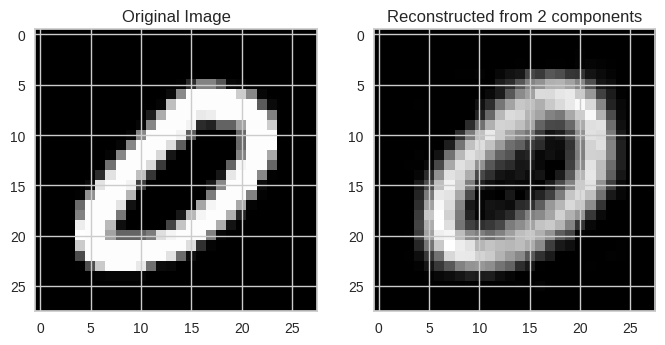

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4));
img_index = 974

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(digits_data_sampled.to_numpy()[img_index,:].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Original Image', fontsize = 12);

# 3 principal components
plt.subplot(1, 2, 2);
plt.imshow(reconstruction_out_unscaled[img_index, :].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Reconstructed from ' + str(latent_dim) + ' components', fontsize = 12);

###Traversing along PC1

What does traversing the embedding look like?

In [68]:
std_dim1 = embedding_df.describe().iloc[2][0]

/tmp/ipython-input-4114232916.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



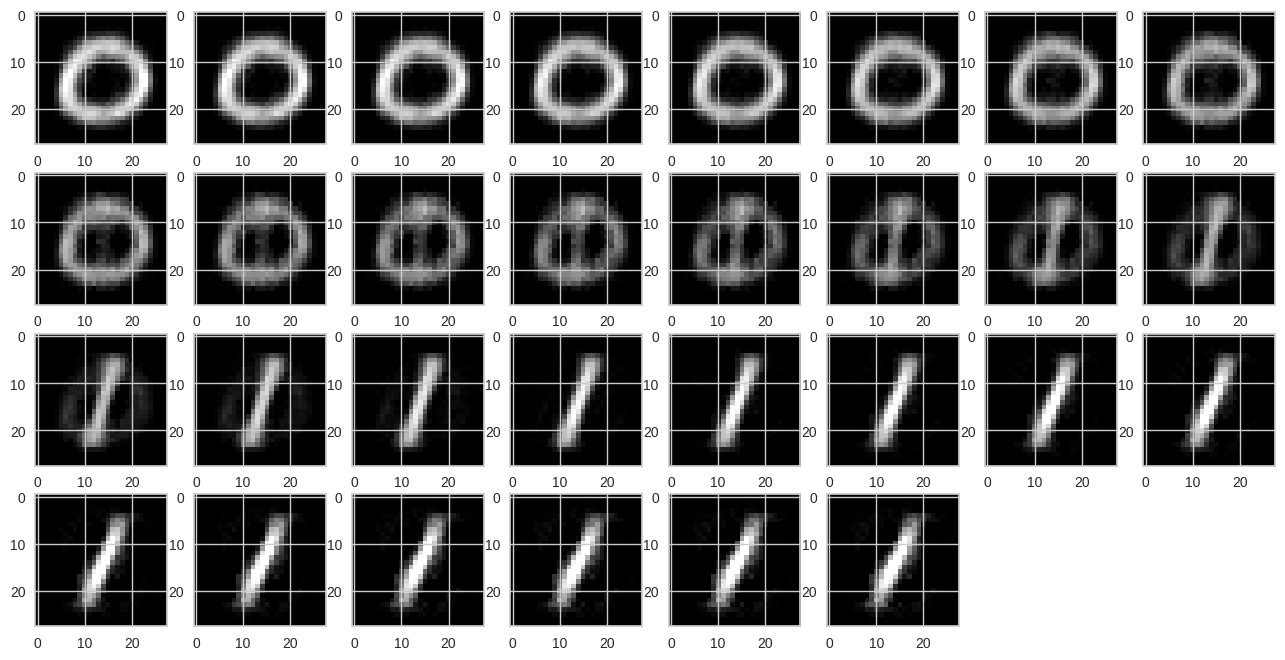

In [69]:
plt.figure(figsize=(16,8));
from PIL import Image

num_of_intermediate_steps_to_display = 30
scale_dim1 = std_dim1/(num_of_intermediate_steps_to_display/2) # number of sigmas


for i in np.arange(-int(num_of_intermediate_steps_to_display/2), int(num_of_intermediate_steps_to_display/2), 1): #for num_of_intermediate_steps_to_display steps
  # datapoint as a torch tensor
  # The datapoint should have dimensionality of latent_dim. All values except for dim0 should be 0
  datapoint = np.array([[1.5]*latent_dim])
  datapoint[0][1] = i*scale_dim1

  datapoint = torch.from_numpy(datapoint).to(dtype=torch.float32)

  # Reconstruct!
  reconstruction = model.decoder(datapoint)["reconstruction"].detach().cpu().numpy()
  reconstruction = scaler.inverse_transform(reconstruction)

  # plot the digit
  plt.subplot(4, int(num_of_intermediate_steps_to_display/4 + 1), i+int(num_of_intermediate_steps_to_display/2)+1);
  plt.imshow(reconstruction.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));

###Sampling from the trained model

In [70]:
from pythae.samplers import NormalSampler

# create normal sampler
normal_samper = NormalSampler(
    model=model
)

# sample
gen_data = normal_samper.sample(
    num_samples=25
)

#unscale the images
gen_data = scaler.inverse_transform(gen_data)


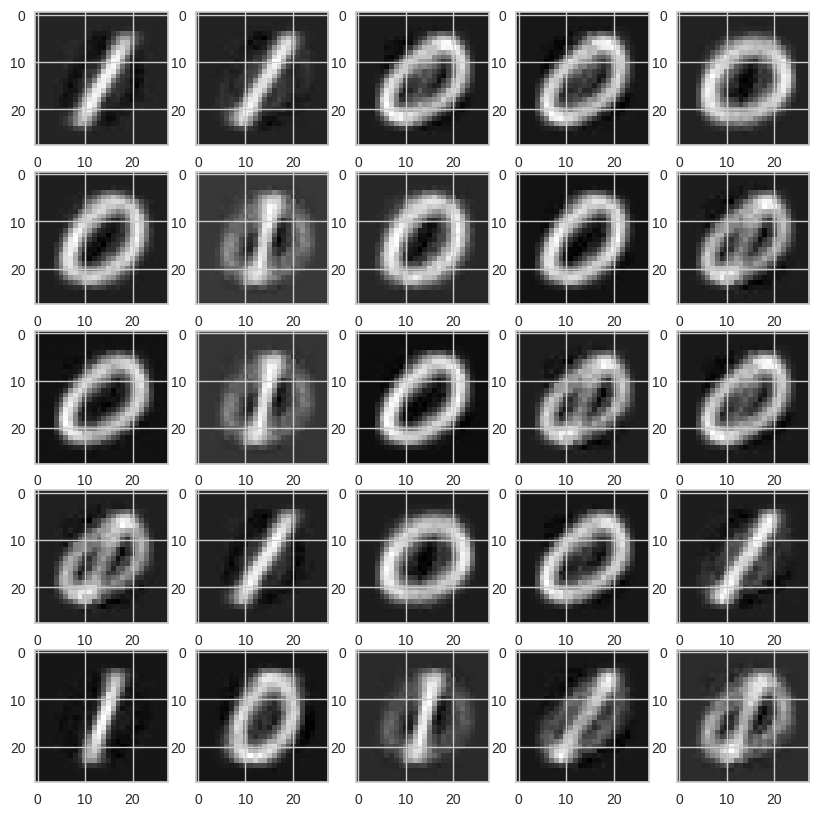

In [71]:
# Display the gen_data images in a 5*5 grid
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(gen_data[i].reshape(28, 28), cmap='gray')